
### EDA - Healthcare - Assignment 2
# **Exploring Drowsiness Patterns in Wearable Device Data**


#### Background:
A wearable technology company produces smartwatches with vital signs sensors. These sensors monitor heart rate and PPG (Photoplethysmography) signals, which include variations in green, red, and infrared light. One of the key features of the company's smartwatch is its ability to detect and alert users to potential drowsiness based on their physiological data.
#### Objective:
The task is to perform an Exploratory Data Analysis (EDA) on a dataset collected from these smartwatches. The dataset includes various physiological parameters along with a 'drowsiness' label, which indicates the level of sleepiness based on an adapted [Karolinska Sleepiness Scale (KSS)](https://www.google.com/url?q=https%3A%2F%2Fwww.med.upenn.edu%2Fcbti%2Fassets%2Fuser-content%2Fdocuments%2FKarolinska%2520Sleepiness%2520Scale%2520%28KSS%29%2520Chapter.pdf).
#### About Dataset:
https://www.kaggle.com/datasets/vitoraugustx/drowsiness-dataset

The dataset was created using a Galaxy Watch4 smartwatch vital signs sensors. Data were collected from heart rate and PPG sensors (PPG includes 3 variations, green, red and infrared). The 'drowsiness' column refers to the label assigned by the user based on an adaptation of the Karolinska Sleepiness Scale (KSS).

Labels range from 0.0 to 2.0, where 0.0 represents level 1 on the KSS scale (Alert), 1.0 corresponds to level 6 (Some signs of sleepiness), and 2.0 indicates level 8 (Sleepy, but some effort to stay awake).
#### Dataset Details:
• Columns:
  * **heartRate:** Heart rate readings from the smartwatch sensors.
  * **ppgGreen, ppgRed, ppgIR:** PPG (Photoplethysmography) sensor readings in green, red, and infrared wavelengths respectively.
  * **drowsiness:** Label indicating the level of drowsiness based on an adapted Karolinska Sleepiness Scale (KSS). Values range from 0.0 to 2.0, where 0.0 represents alertness and 2.0 represents significant drowsiness.

# Exploratory Data Analysis (EDA)

## Summary Statistics

In [7]:
### Import all the libraries ###
import pandas as pd

# Adjust the file name based on what the downloaded file is named
filename = 'drowsiness_dataset.csv'

data = pd.read_csv(filename)

# Display the first few rows of the data set
print(data.head())

   heartRate   ppgGreen     ppgRed      ppgIR  drowsiness
0       54.0  1584091.0  5970731.0  6388383.0         0.0
1       54.0  1584091.0  5971202.0  6392174.0         0.0
2       54.0  1581111.0  5971295.0  6391469.0         0.0
3       54.0  1579343.0  5972599.0  6396137.0         0.0
4       54.0  1579321.0  5971906.0  6392898.0         0.0


In [2]:
# Summary of a DataFrame's structure and information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890260 entries, 0 to 4890259
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   heartRate   float64
 1   ppgGreen    float64
 2   ppgRed      float64
 3   ppgIR       float64
 4   drowsiness  float64
dtypes: float64(5)
memory usage: 186.5 MB
None


*   Size and Shape: The dataset has 4890260 rows and 5 columns. 
*   Data Types: All the columns contain floating-point numbers (float64). 

In [4]:
# Verifying for missing values
print(data.isnull().sum())

heartRate     0
ppgGreen      0
ppgRed        0
ppgIR         0
drowsiness    0
dtype: int64


* There is no missing values in the dataset

In [5]:
# Summary statistics for numerical features
summary_statistics = data[['heartRate', 'ppgGreen', 'ppgRed', 'ppgIR']].describe()
print(summary_statistics)

          heartRate      ppgGreen        ppgRed         ppgIR
count  4.890260e+06  4.890260e+06  4.890260e+06  4.890260e+06
mean   7.814245e+01  2.073589e+06  5.643653e+06  5.728191e+06
std    1.296635e+01  4.418773e+05  3.909626e+05  4.313052e+05
min    5.000000e+01  5.897580e+05  4.441989e+06  4.409976e+06
25%    6.800000e+01  1.780621e+06  5.368700e+06  5.402542e+06
50%    7.800000e+01  2.044658e+06  5.646039e+06  5.818748e+06
75%    8.700000e+01  2.333117e+06  5.927128e+06  6.016016e+06
max    1.190000e+02  3.530798e+06  6.842637e+06  7.061799e+06


## Distribution Analysis

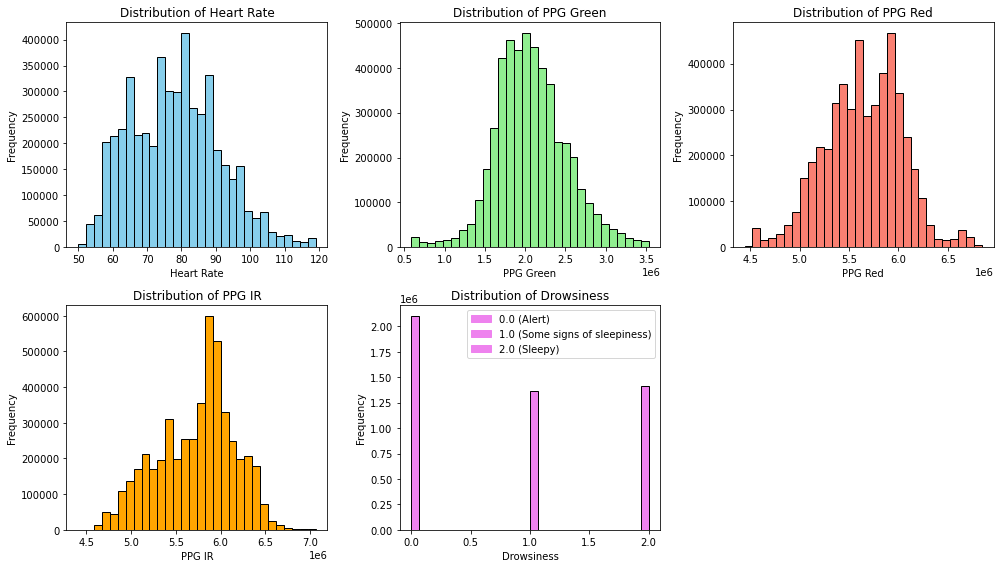

In [16]:
# Plot distributions of each variable
plt.figure(figsize=(14, 8))

# Plot distributions of numerical features

# Heart Rate
plt.subplot(2, 3, 1)
plt.hist(data['heartRate'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')

# PPG Green
plt.subplot(2, 3, 2)
plt.hist(data['ppgGreen'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of PPG Green')
plt.xlabel('PPG Green')
plt.ylabel('Frequency')

# PPG Red
plt.subplot(2, 3, 3)
plt.hist(data['ppgRed'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of PPG Red')
plt.xlabel('PPG Red')
plt.ylabel('Frequency')

# PPG IR
plt.subplot(2, 3, 4)
plt.hist(data['ppgIR'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of PPG IR')
plt.xlabel('PPG IR')
plt.ylabel('Frequency')

# Plot distributions of categorical feature

# Drowsiness
plt.subplot(2, 3, 5)
plt.hist(data['drowsiness'], bins=30, color='violet', edgecolor='black')
plt.title('Distribution of Drowsiness')
plt.xlabel('Drowsiness')
plt.ylabel('Frequency')
labels = ['0.0 (Alert)', '1.0 (Some signs of sleepiness)', '2.0 (Sleepy)']
handles = [plt.Rectangle((0,0),1,1, color=c) for c in ['violet', 'violet', 'violet']]
plt.legend(handles, labels, loc='upper right') 
plt.tight_layout()
plt.show()

From observing the distribution plots, the following insights can be assumed:
#### Distribution of Heart Rate
• **Shape**: The heart rate distribution is roughly normal, with a slight skew to the right.

• **Center**: Most heart rate values are centered around 75-85 beats per minute (BPM).

• **Spread**: Range approximately 50-120 bpm, with most values between 60-100 bpm.
#### Distribution of PPG Green
• **Shape**: The PPG Green distribution appears to be approximately normal and relatively symmetric.

• **Center**: Most PPG Green values are centered around 1.5 to 2.5 million.

• **Spread**: The values range from around 0.5 to 3.5 million, with the bulk of the data falling in the middle range.
#### Distribution of PPG Red
• **Shape**: The PPG Red distribution also shows a roughly normal.

• **Center**: Most PPG Red values are centered around 5.5 to 6.0 million.

• **Spread**: The values range from around 4.5 to 6.5 million.
#### Distribution of PPG IR
• **Shape**: The PPG IR distribution is is roughly normal, with a slight skew to the left.

• **Center**: Most PPG IR values are centered around 5.75 to 6.25 million.

• **Spread**: The values range from around 4.5 to 7.0 million.
#### Distribution of Drowsiness
• **Shape**: The drowsiness distribution is categorical and imbalanced. The imbalance in the drowsiness levels indicates that there are more data points labeled as alert (0) compared to the other levels. Lower but similar frequencies for 1 and 2, indicating fewer instances of moderate and high drowsiness.

## Correlation Analysis

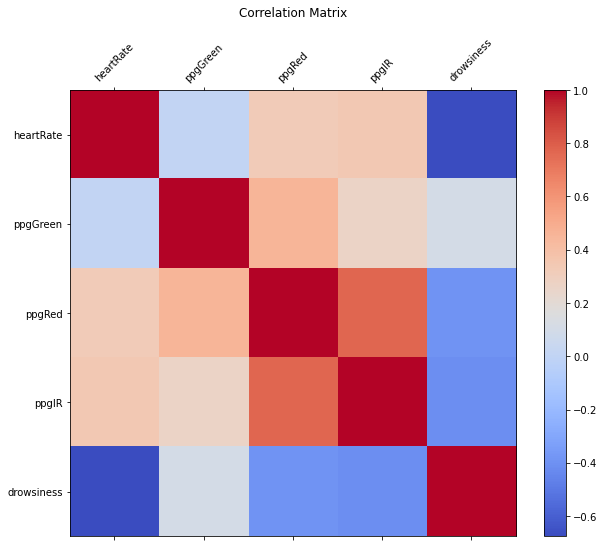

,heartRate,ppgGreen,ppgRed,ppgIR,drowsiness
heartRate,1.000000,0.008516,0.319754,0.344291,-0.675909
ppgGreen,0.008516,1.000000,0.453679,0.263743,0.108788
ppgRed,0.319754,0.453679,1.000000,0.768679,-0.389148
ppgIR,0.344291,0.263743,0.768679,1.000000,-0.413469
drowsiness,-0.675909,0.108788,-0.389148,-0.413469,1.000000


In [17]:
# Correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix', pad=20)
plt.show()

correlation_matrix

The correlation matrix can be interpreted in the following way:
#### Correlations between Features and Drowsiness
1. Heart Rate and Drowsiness:
    * Correlation: -0.675909
    * Interpretation: There is a strong negative correlation between heart rate and drowsiness. As drowsiness increases, heart rate tends to decrease significantly.
2. PPG Green and Drowsiness:
    * Correlation: 0.108788
    * Interpretation: There is a very weak positive correlation between PPG Green and drowsiness. This relationship is not very strong, indicating that PPG Green does not vary much with drowsiness levels.
3. PPG Red and Drowsiness:
    * Correlation: -0.389148
    * Interpretation: There is a moderate negative correlation between PPG Red and drowsiness. As drowsiness increases, PPG Red values tend to decrease.
4. PPG IR and Drowsiness:
    * Correlation: -0.413469
    * Interpretation: There is a moderate negative correlation between PPG IR and drowsiness. As drowsiness increases, PPG IR values tend to decrease.
    
#### Correlations between Features 
1. Heart Rate with PPG Green, PPG Red, and PPG IR:
    * PPG Green: 0.008516 (very weak positive correlation)
    * PPG Red: 0.319754 (moderate positive correlation)
    * PPG IR: 0.344291 (moderate positive correlation)
    * Interpretation: Heart rate is moderately correlated with PPG Red and PPG IR, indicating some relationship. However, the correlation with PPG Green is very weak, suggesting little to no relationship.
2. PPG Green with PPG Red and PPG IR:
    * PPG Red: 0.453679 (moderate positive correlation)
    * PPG IR: 0.263743 (weak to moderate positive correlation)
    * Interpretation: PPG Green shows a moderate positive correlation with both PPG Red and PPG IR, indicating that these variables tend to increase together to some extent.
3. PPG Red and PPG IR:
    * Correlation: 0.768679
    * Interpretation: There is a strong positive correlation between PPG Red and PPG IR, indicating that these two variables are closely related and tend to increase together.
    
#### Summary of Insights
Heart Rate has a strong negative correlation with drowsiness, making it a significant indicator of drowsiness levels.
PPG Red and PPG IR have moderate negative correlations with drowsiness, suggesting they also play a role in indicating drowsiness levels.
PPG Green shows a very weak positive correlation with drowsiness, indicating it is less useful as an indicator of drowsiness.
There are moderate to strong positive correlations between the PPG readings themselves, especially between PPG Red and PPG IR.    

## Box Plots

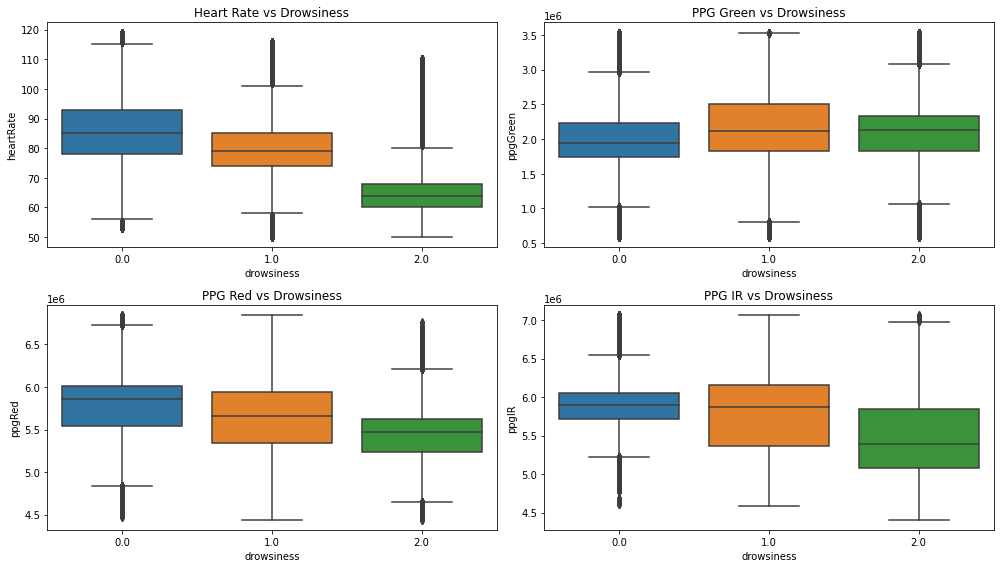

In [10]:
# Visualize the relationship between numerical features and drowsiness levels.

import seaborn as sns

plt.figure(figsize=(14, 8))

# Heart Rate vs Drowsiness
plt.subplot(2, 2, 1)
sns.boxplot(x='drowsiness', y='heartRate', data=data)
plt.title('Heart Rate vs Drowsiness')

# PPG Green vs Drowsiness
plt.subplot(2, 2, 2)
sns.boxplot(x='drowsiness', y='ppgGreen', data=data)
plt.title('PPG Green vs Drowsiness')

# PPG Red vs Drowsiness
plt.subplot(2, 2, 3)
sns.boxplot(x='drowsiness', y='ppgRed', data=data)
plt.title('PPG Red vs Drowsiness')

# PPG IR vs Drowsiness
plt.subplot(2, 2, 4)
sns.boxplot(x='drowsiness', y='ppgIR', data=data)
plt.title('PPG IR vs Drowsiness')

plt.tight_layout()
plt.show()

From observing the box plots, the following insights can be drawn:

#### Heart Rate vs. Drowsiness
• **Drowsiness Level 0 (Alert)**: The median heart rate is higher compared to the other drowsiness levels, with a range approximately between 75 and 95 BPM.

• **Drowsiness Level 1 (Some signs of sleepiness)**: The median heart rate decreases slightly, with a range approximately between 55 and 100 BPM.

• **Drowsiness Level 2 (Sleepy)**: The median heart rate is the lowest, with a range approximately between 50 and 80 BPM.

• **Insight**:<br> 
    As drowsiness increases, the heart rate tends to decrease. This supports the strong negative correlation observed between heart rate and drowsiness.
#### PPG Green vs. Drowsiness
• **Drowsiness Level 0 (Alert)**: The median PPG Green value is lower compared to the other drowsiness levels.

• **Drowsiness Level 1 (Some signs of sleepiness)**: The median PPG Green value remains relatively stable but slightly higher than when alert.

• **Drowsiness Level 2 (Sleepy)**: he median PPG Green remains stable.

• **Insight**:<br>  
    There is a weak positive relationship between PPG Green and drowsiness, as indicated by the slight increase in PPG Green values with increasing drowsiness levels.
#### PPG Red vs. Drowsiness
• **Drowsiness Level 0 (Alert)**: The median PPG Red value is the highest among the three levels.

• **Drowsiness Level 1 (Some signs of sleepiness)**: The median PPG Red value decreases.

• **Drowsiness Level 2 (Sleepy)**: The median PPG Red value is the lowest.

• **Insight**:<br> 
    There is a moderate negative relationship between PPG Red and drowsiness. As drowsiness increases, PPG Red values tend to decrease, aligning with the moderate negative correlation observed.
#### PPG IR vs. Drowsiness
• **Drowsiness Level 0 (Alert)**: The median PPG IR value is the highest.

• **Drowsiness Level 1 (Some signs of sleepiness)**: The median PPG IR value decreases.

• **Drowsiness Level 2 (Sleepy)**: The median PPG IR value is the lowest.

• **Insight**:<br>
    Similar to PPG Red, there is a moderate negative relationship between PPG IR and drowsiness. PPG IR values decrease as drowsiness increases.
#### General Insights
1. **Heart Rate**: The strongest indicator of drowsiness among the features. The decreasing trend in heart rate as drowsiness increases is evident and supports the strong negative correlation.
2. **PPG Red and PPG IR**: Both show moderate negative correlations with drowsiness. These features are useful in indicating drowsiness levels, though not as strongly as heart rate.
3. **PPG Green**: Shows a weak positive correlation with drowsiness, indicating it is less useful for distinguishing between different levels of drowsiness.

## Data segmentation by periods of the day

In [20]:
# Define the number of periods
num_periods = 4

# Calculate the size of each period
period_size = len(data) // num_periods

# Create a period column
period_labels = ['Morning', 'Afternoon', 'Evening', 'Night']
data['period'] = pd.cut(data.index, bins=num_periods, labels=period_labels)

# Check the distribution of periods
print(data['period'].value_counts())

# Segment the data by period
morning_data = data[data['period'] == 'Morning']
afternoon_data = data[data['period'] == 'Afternoon']
evening_data = data[data['period'] == 'Evening']
night_data = data[data['period'] == 'Night']


Morning      1222565
Afternoon    1222565
Evening      1222565
Night        1222565
Name: period, dtype: int64


Correlation between drowsiness and heart rate (Morning): -0.6319114762754598
Correlation between drowsiness and PPG Green (Morning): -0.08278873014767009
Correlation between drowsiness and PPG Red (Morning): -0.6565096863047241
Correlation between drowsiness and PPG IR (Morning): -0.5784903897390494


C:\Users\dell\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


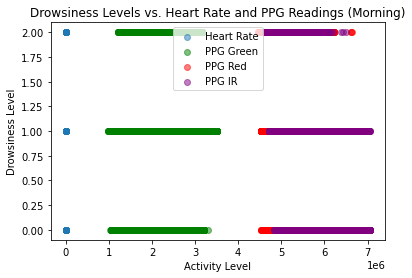

Correlation between drowsiness and heart rate (Afternoon): -0.7295576553745048
Correlation between drowsiness and PPG Green (Afternoon): 0.2414021220021895
Correlation between drowsiness and PPG Red (Afternoon): 0.03613894088399899
Correlation between drowsiness and PPG IR (Afternoon): -0.2655153229308318


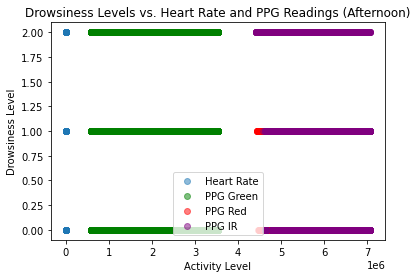

Correlation between drowsiness and heart rate (Evening): -0.6319114762754598
Correlation between drowsiness and PPG Green (Evening): -0.08278873014767009
Correlation between drowsiness and PPG Red (Evening): -0.6565096863047241
Correlation between drowsiness and PPG IR (Evening): -0.5784903897390494


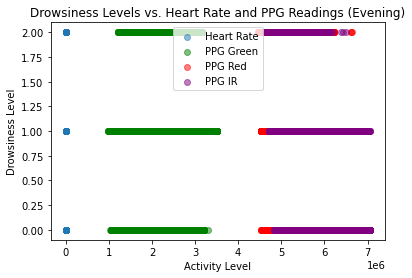

Correlation between drowsiness and heart rate (Night): -0.7295576553745048
Correlation between drowsiness and PPG Green (Night): 0.2414021220021895
Correlation between drowsiness and PPG Red (Night): 0.03613894088399899
Correlation between drowsiness and PPG IR (Night): -0.2655153229308318


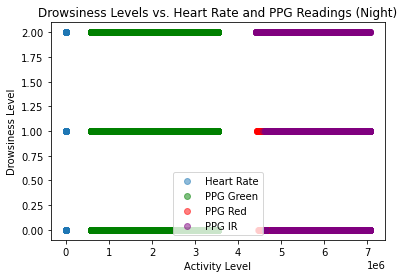

In [19]:
# Define Function to Calculate and Plot Correlations

def calculate_and_plot_correlations(data, period_name):
    correlation_heart_rate = data['drowsiness'].corr(data['heartRate'])
    correlation_ppg_green = data['drowsiness'].corr(data['ppgGreen'])
    correlation_ppg_red = data['drowsiness'].corr(data['ppgRed'])
    correlation_ppg_ir = data['drowsiness'].corr(data['ppgIR'])

    print(f'Correlation between drowsiness and heart rate ({period_name}): {correlation_heart_rate}')
    print(f'Correlation between drowsiness and PPG Green ({period_name}): {correlation_ppg_green}')
    print(f'Correlation between drowsiness and PPG Red ({period_name}): {correlation_ppg_red}')
    print(f'Correlation between drowsiness and PPG IR ({period_name}): {correlation_ppg_ir}')

    # Create scatter plots for each numerical feature against drowsiness.
    plt.scatter(data['heartRate'], data['drowsiness'], alpha=0.5, label='Heart Rate')
    plt.scatter(data['ppgGreen'], data['drowsiness'], alpha=0.5, label='PPG Green', color='green')
    plt.scatter(data['ppgRed'], data['drowsiness'], alpha=0.5, label='PPG Red', color='red')
    plt.scatter(data['ppgIR'], data['drowsiness'], alpha=0.5, label='PPG IR', color='purple')
    plt.title(f'Drowsiness Levels vs. Heart Rate and PPG Readings ({period_name})')
    plt.xlabel('Activity Level')
    plt.ylabel('Drowsiness Level')
    plt.legend()
    plt.show()

# Call the function to calculate and plot correlations for each period
calculate_and_plot_correlations(morning_data, 'Morning')
calculate_and_plot_correlations(afternoon_data, 'Afternoon')
calculate_and_plot_correlations(evening_data, 'Evening')
calculate_and_plot_correlations(night_data, 'Night')

From these plots and correlation data, can be drawn insights about how drowsiness relates to heart rate and PPG (photoplethysmogram) readings across different times of day:

1. **Heart Rate**:
    * Consistently shows a strong negative correlation with drowsiness across all times of day.
    * The correlation is strongest in the afternoon and night (-0.73), and slightly less in the morning and evening (-0.63).
    * This suggests that as drowsiness increases, heart rate tends to decrease significantly.


2. **PPG Green**:
    * Shows varying correlations throughout the day.
    * Negative correlation in the morning and evening (-0.08).
    * Positive correlation in the afternoon and night (0.24).
    * This suggests that PPG Green's relationship with drowsiness is not consistent and may be influenced by time of day.


3. **PPG Red**:
    * Shows a strong negative correlation in the morning (-0.66) and evening (-0.66).
    * Weak positive correlation in the afternoon and night (0.04).
    * This indicates that PPG Red's relationship with drowsiness changes dramatically between morning/evening and afternoon/night.


4. **PPG IR**:
    * Consistently shows a negative correlation with drowsiness.
    * Strongest in the morning (-0.58), moderately strong in the evening (-0.58), and weaker in the afternoon/night (-0.27).
    * This suggests that PPG IR decreases as drowsiness increases, but the strength of this relationship varies throughout the day.


5. **Time of Day Effects**:
    * The relationships between drowsiness and physiological measures appear to change between morning/evening and afternoon/night periods.
    * This could indicate that circadian rhythms or daily activities influence how drowsiness manifests in these physiological measures.


6. **Consistency of Measurements**:
    * Heart rate shows the most consistent relationship with drowsiness across all times of day.
    * PPG measurements, especially Green and Red, show more variability in their relationships with drowsiness depending on the time of day.


7. **Drowsiness Levels**:

    * The plots show distinct clusters for drowsiness levels 0, 1, and 2, indicating clear physiological differences between these states.


8. **Activity Levels**:
    * The x-axis (Activity Level) shows a wide range of values for each physiological measure, suggesting that these measures vary significantly even within the same drowsiness level.

## Conclusion
1. Heart Rate as a Key Indicator:
    * The heart rate consistently shows a strong negative correlation with drowsiness levels across all periods of the day. As drowsiness increases, heart rate decreases significantly. This makes heart rate a reliable physiological measure for predicting drowsiness.


2. PPG Red and PPG IR as Supportive Indicators:
    * Both PPG Red and PPG IR readings show moderate to strong negative correlations with drowsiness, particularly in the morning and evening. These readings also tend to decrease as drowsiness increases, supporting their use as additional indicators.


3. PPG Green as a Weak Indicator:
    * PPG Green shows weak and inconsistent correlations with drowsiness levels, making it a less reliable indicator for predicting drowsiness compared to heart rate and the other PPG readings.


4. Daily Variations:
    * The correlations between drowsiness and physiological measures vary across different periods of the day. While the morning and evening show stronger correlations for most measures, the afternoon and night periods show weaker correlations.

## Actionable Recommendations
1. Implement Real-Time Monitoring:
    * Develop a system to monitor heart rate and PPG readings in real-time. Focus on heart rate as the primary indicator and use PPG Red and PPG IR as supportive measures to provide a comprehensive assessment of drowsiness levels.


2. Personalized Alerts:
    * Based on the identified strong correlations, create personalized alert systems that notify individuals when their physiological readings indicate increased drowsiness. This can be particularly useful for individuals operating machinery, driving, or performing tasks that require high alertness.


3. Time-of-Day Adjustments:
    * Adjust the monitoring algorithms to account for variations in physiological readings at different times of the day. For example, place more emphasis on heart rate and PPG Red/IR readings in the morning and evening when the correlations are stronger.


4. User Education:
    * Educate users about the importance of monitoring their physiological readings and understanding the signs of drowsiness. Provide guidelines on how to interpret the alerts and take appropriate actions.


5. Further Research:
    * Conduct further research to explore the weak correlations observed with PPG Green and understand any underlying factors. Investigate other potential physiological indicators that may complement heart rate and PPG readings.